## 1.我们先对数据进行预处理，增添星期信息，删去缺失值

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
pm25_data = pd.read_csv('pm25_data.csv')

# 得到week
week_list=[]
for date in pm25_data['date']:
    week_list.append(pd.to_datetime(date).weekday())
pm25_data['week']=week_list

# 删除missing data
pm25_dropna=pm25_data.dropna(axis=0, how='any', inplace=False) 

## 2.1用折线图记录每年一天24小时pm2.5的变化趋势，取每年每小时的平均浓度作为当年该小时的对应值

## Variation of pm2.5 on time period of the day

In [3]:
Year=[2010,2011,2012,2013,2014]
Hour=range(24)
day_of_year=[[],[],[],[],[]]

variation_of_day=pd.DataFrame()
for index, year in enumerate(Year):
    pm25_year=pm25_dropna[pm25_dropna.year==year]
    for hour in Hour:
        pm25_hour_year=pm25_year[pm25_year.hour==hour]
        mean=np.mean(pm25_hour_year['pm2.5'])
        day_of_year[index].append(mean)
        
variation_of_day=variation_of_day.append(day_of_year)
variation_of_day.index=Year    

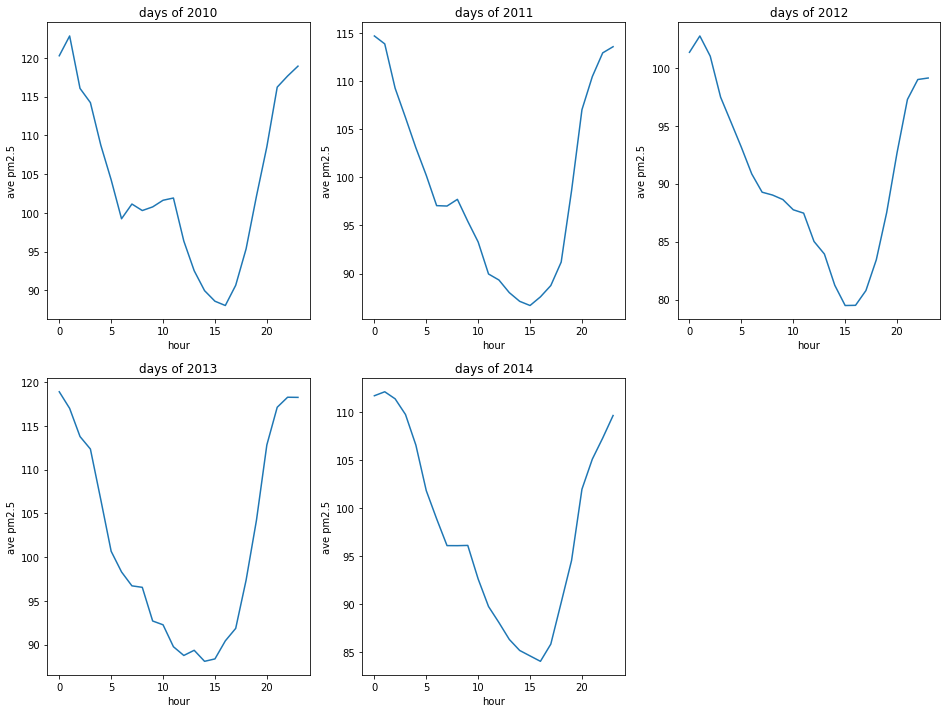

In [4]:
plt.figure(figsize=(16,12))

for i in range(5):
    plt.subplot(2,3,i+1)
    plt.plot(Hour,variation_of_day.iloc[i,:])
    plt.title('days of %d' % Year[i])
    plt.xlabel('hour')
    plt.ylabel('ave pm2.5')
    

In [45]:
variation_of_day

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
2010,120.273529,122.829412,116.061947,114.226471,108.749263,104.267062,99.238806,101.139466,100.300595,100.769461,...,89.961194,88.598214,88.044379,90.654867,95.348083,102.147929,108.528190,116.224852,117.659763,118.934718
2011,114.679758,113.856287,109.252252,106.197605,103.056886,100.200599,97.050746,97.008955,97.703593,95.423881,...,87.109792,86.674556,87.573529,88.749263,91.186391,98.606607,107.018018,110.458084,112.921687,113.563253
2012,101.342029,102.751445,101.008671,97.469741,95.317003,93.146974,90.849275,89.273256,89.029070,88.638728,...,81.245665,79.498551,79.514451,80.786744,83.441261,87.514368,92.676301,97.273256,98.994220,99.123919
2013,118.903047,117.002755,113.783934,112.355372,106.573003,100.667590,98.305785,96.715470,96.545455,92.696133,...,88.086592,88.362117,90.426184,91.852778,97.359116,104.215470,112.823204,117.132231,118.278237,118.261708
2014,111.712291,112.127072,111.391667,109.753463,106.559557,101.814404,98.870166,96.077562,96.072022,96.096685,...,85.138504,84.570637,84.005650,85.801120,90.140496,94.529086,101.961326,105.099448,107.298343,109.650138


## 从记录图中我们可以看出，这5年间pm2.5每天的变化趋势均相似，0点至15点浓度下降，15点至24点浓度上升
## 尽管国务院于2013年10月宣布，计划到2017年将京津冀地区的pm2.5浓度降至2012年水平的75%，平均浓度调至60μg m^-3， 但从图中可知2014年的变化趋势于2012年相似，平均最高浓度不降反升

## 2.2用折线图记录每年一周每天pm2.5的变化趋势，取每年每星期一天的平均浓度作为当年该天的对应值

## Variation of pm2.5 on time period of the week

In [5]:
Week=range(7)
week_of_year=[[],[],[],[],[]]

variation_of_week=pd.DataFrame()
for index, year in enumerate(Year):
    pm25_year=pm25_dropna[pm25_dropna.year==year]
    for week in Week:
        pm25_week_year=pm25_year[pm25_year.week==week]
        mean=np.mean(pm25_week_year['pm2.5'])
        week_of_year[index].append(mean)        
variation_of_week=variation_of_week.append(week_of_year)
variation_of_week.index=Year    

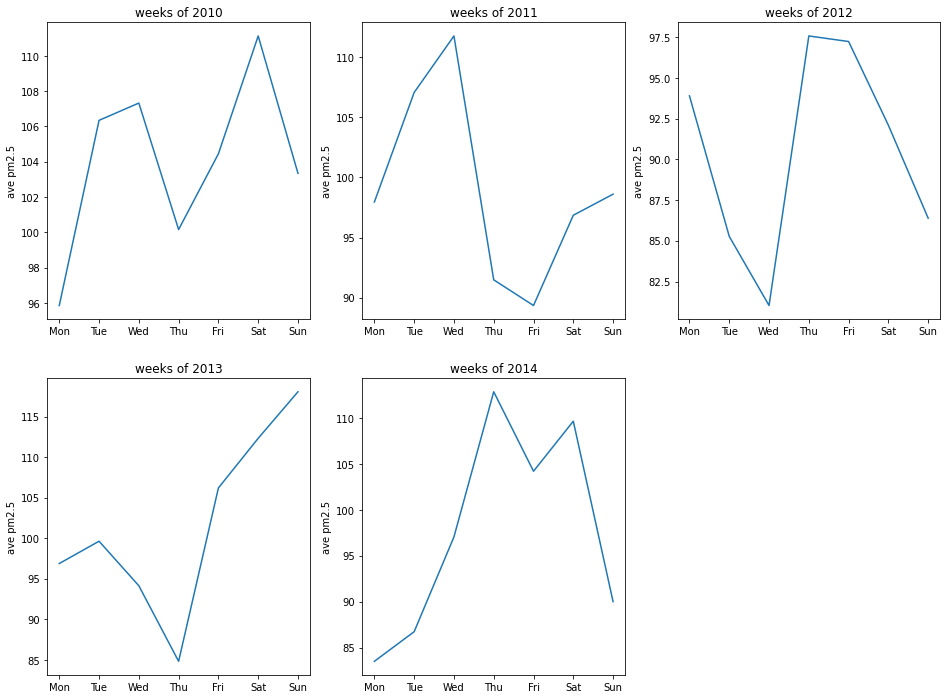

In [6]:
plt.figure(figsize=(16,12))
Week_str=['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

for i in range(5):
    plt.subplot(2,3,i+1)
    plt.plot(Week_str,variation_of_week.iloc[i,:])
    plt.title('weeks of %d' % Year[i])
    plt.ylabel('ave pm2.5')

In [46]:
variation_of_week

,0,1,2,3,4,5,6
2010,95.857762,106.345912,107.325044,100.161371,104.451159,111.125977,103.341783
2011,97.950904,107.051546,111.747607,91.485765,89.352000,96.851045,98.602929
2012,93.893506,85.267123,81.026424,97.571311,97.229508,92.088407,86.384411
2013,96.876121,99.627482,94.140675,84.820016,106.195617,112.315534,118.053183
2014,83.505297,86.729642,97.050040,112.861985,104.207455,109.656123,90.003223


## 我们注意到每年每星期pm2.5平均浓度变化趋势完全不同

## 2.3用折线图记录每年每月pm2.5的变化趋势，取每年每月的平均浓度作为当年该月的对应值

## Variation of pm2.5 on time period of the month

In [7]:
Month=range(1,13)
month_of_year=[[],[],[],[],[]]

variation_of_month=pd.DataFrame()
for index, year in enumerate(Year):
    pm25_year=pm25_dropna[pm25_dropna.year==year]
    for month in Month:
        pm25_month_year=pm25_year[pm25_year.month==month]
        mean=np.mean(pm25_month_year['pm2.5'])
        month_of_year[index].append(mean)        
variation_of_month=variation_of_month.append(month_of_year)
variation_of_month.index=Year    

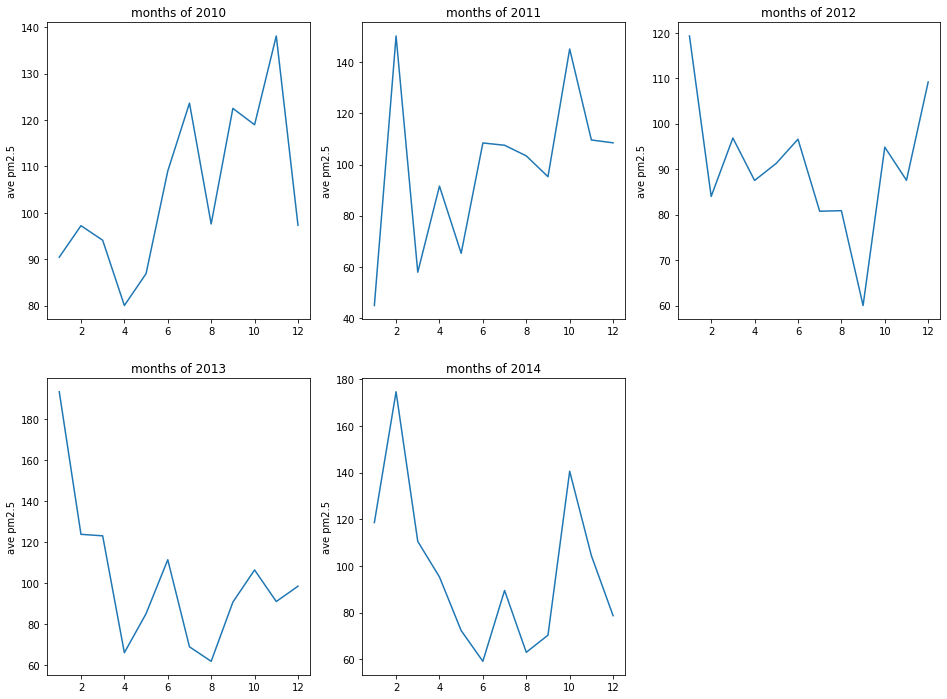

In [8]:
plt.figure(figsize=(16,12))

for i in range(5):
    plt.subplot(2,3,i+1)
    plt.plot(Month,variation_of_month.iloc[i,:])
    plt.title('months of %d' % Year[i])
    plt.ylabel('ave pm2.5')

In [47]:
variation_of_month

,0,1,2,3,4,5,6,7,8,9,10,11
2010,90.442573,97.233979,94.100141,80.029248,86.899593,109.003540,123.647849,97.602071,122.510684,118.982480,138.120482,97.333333
2011,44.891369,150.321429,57.918400,91.585821,65.321629,108.466948,107.572200,103.424561,95.272601,145.225649,109.632168,108.519515
2012,119.310448,83.997101,96.856757,87.518776,91.280753,96.596045,80.748547,80.865169,60.001401,94.839189,87.555874,109.197068
2013,193.273342,123.801788,123.064953,66.113287,85.125172,111.416435,68.983718,61.907483,90.747559,106.448509,91.045961,98.511050
2014,118.557666,174.617339,110.485868,95.232915,72.254717,59.082504,89.455902,62.942701,70.293706,140.555855,104.378187,78.648045


## 我们注意到每年每月pm2.5平均浓度变化趋势不同，但从2011年后，基本从2月到10月浓度维持在相对较低水平，而其余月份基本维持在相对较高水平，可能与冬季居民供暖有关
## 京津冀居民供暖一般从11月15日开始，至3月15日结束

## 2.4用折线图记录每年四季pm2.5的变化趋势，取每年每个季度的平均浓度作为当年该季度的对应值

## 我们认为春季对应2、3、4月，夏季对应5、6、7月， 秋季对应8、9、10月， 冬季对应11、12、1月

## Variation of pm2.5 on time period of the season

In [9]:
season_of_year=[[],[],[],[],[]]

variation_of_season=pd.DataFrame()
for index, year in enumerate(Year):
    pm25_year=pm25_dropna[pm25_dropna.year==year]
    mean_spring=(variation_of_month.loc[year,2]+variation_of_month.loc[year,3]+variation_of_month.loc[year,4])/3
    mean_summer=(variation_of_month.loc[year,5]+variation_of_month.loc[year,6]+variation_of_month.loc[year,7])/3
    mean_fall=(variation_of_month.loc[year,8]+variation_of_month.loc[year,9]+variation_of_month.loc[year,10])/3
    mean_winter=(variation_of_month.loc[year,11]+variation_of_month.loc[year,0]+variation_of_month.loc[year,1])/3
    season_of_year[index].append(mean_spring)
    season_of_year[index].append(mean_summer)
    season_of_year[index].append(mean_fall)
    season_of_year[index].append(mean_winter)   
variation_of_season=variation_of_season.append(season_of_year)
variation_of_season.index=Year    

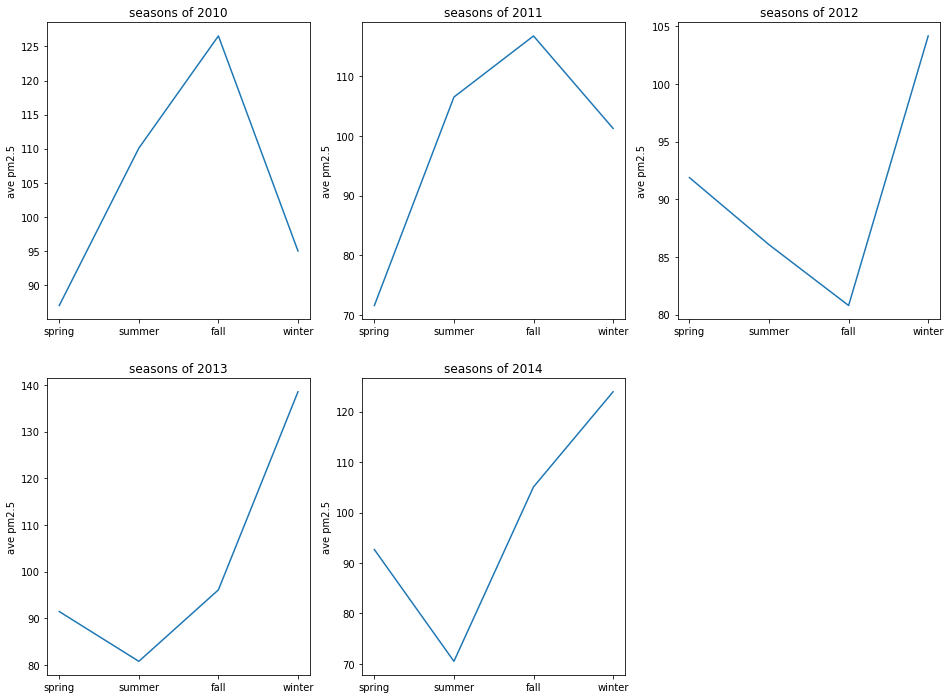

In [10]:
plt.figure(figsize=(16,12))
Seasons=['spring','summer','fall','winter']

for i in range(5):
    plt.subplot(2,3,i+1)
    plt.plot(Seasons,variation_of_season.iloc[i,:])
    plt.title('seasons of %d' % Year[i])
    plt.ylabel('ave pm2.5')

In [48]:
variation_of_season

,0,1,2,3
2010,87.009661,110.084487,126.537882,95.003295
2011,71.608617,106.487903,116.710139,101.244104
2012,91.885428,86.069920,80.798821,104.168206
2013,91.434470,80.769212,96.080677,138.528727
2014,92.657833,70.493702,105.075916,123.941017


## 我们注意到2010年和2011年，秋季达到平均浓度最高值，浓度从春夏秋上升，秋冬下降
## 2012、2013、2014年夏季平均浓度最低，夏秋冬三季依次上升，浓度在冬季最高，之后下降

## 2.5用折线图记录每年pm2.5的变化趋势，取每年平均浓度作为当年的对应值

## Variation of pm2.5 on time period of years

In [11]:
varaition_of_year=[]
for year in Year:
    pm25_year=pm25_dropna[pm25_dropna.year==year]
    mean=np.mean(pm25_year['pm2.5'])
    varaition_of_year.append(mean) 

Text(0, 0.5, 'ave pm2.5')

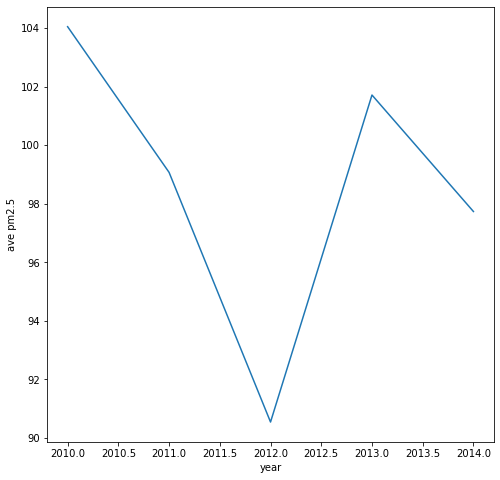

In [12]:
plt.figure(figsize=(8,8))
plt.plot(Year,varaition_of_year)
plt.xlabel('year')
plt.ylabel('ave pm2.5')

In [49]:
varaition_of_year

[104.04572982326042,
 99.07133964143426,
 90.5458710066305,
 101.71237612353077,
 97.73455721048377]

## 我们注意到这五年间2012年平均浓度最低， 2010至2012年连续下降，2013年达到较高水平后2014年再次下降至2011年水平

## 3 利用上述与时间有关的pm2.5平均浓度信息，分别使用每条数据的时间信息和天气信息，运用task1中提出的xgboost模型、训练集和测试集，实现对pm2.5浓度的预测，同时使用score作为预测结果好坏的测量标准，认为越接近1预测效果越好

## Prediction

## 3.1 仿照task1设置相同的训练集与测试集，删去浓度为0的数据后，对浓度进行对数转换

In [13]:
# test data date
test_date=pd.date_range(start='2010-01-07',freq='W-Thu',end='2014-12-25').strftime('%Y-%m-%d').tolist()

# test data index
test_index=[]
for i in range(len(pm25_dropna['date'])):
    if pm25_dropna.iloc[i,-2] in test_date:
        test_index.append(i)

In [14]:
# delete 0
pm25_dropna = pm25_dropna.drop(pm25_dropna[pm25_dropna['pm2.5'] == 0].index)
# 检查对数转换后样本分布情况
pm25_dropna['pm2.5_log'] = np.log(pm25_dropna['pm2.5'])
# test and train data
test_data=pm25_dropna.iloc[test_index,:].reset_index(drop=True)
train_data=pm25_dropna.drop(index=pm25_dropna.index[test_index]).reset_index(drop=True)

## 3.2 分别使用每年一天24小时数据的时间信息和天气信息，对每小时pm2.5平均浓度进行预测，将两种方法下每年每小时的预测score用折线图分别绘出

## Predict pm2.5 on time period of the day by xgboost

In [15]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error 
from sklearn import preprocessing

In [16]:
Year=[2010,2011,2012,2013,2014]
Hour=range(24)
day_of_year_train=[[],[],[],[],[]]
day_of_year_test=[[],[],[],[],[]]
score_of_year_time = [[],[],[],[],[]]
score_of_year_weather = [[],[],[],[],[]]
var_time = ['year', 'month', 'day', 'hour', 'week']
var_weather = ['DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir', 'cbwd_NE', 'cbwd_NW', 'cbwd_SE', 'cbwd_cv']

variation_of_day_time=pd.DataFrame()
variation_of_day_weather=pd.DataFrame()
for index, year in enumerate(Year):
    train_data_year=train_data[train_data.year==year]
    test_data_year=test_data[test_data.year==year]
    for hour in Hour:
        train_data_hour_year=train_data_year[train_data_year.hour==hour]
        test_data_hour_year=test_data_year[test_data_year.hour==hour]
        
        ## Only use time to predict
        X_train_data_hour_year_time = train_data_hour_year[var_time]
        X_test_data_hour_year_time = test_data_hour_year[var_time]
        y_train_data_hour_year = train_data_hour_year['pm2.5_log']
        y_test_data_hour_year = test_data_hour_year['pm2.5']
        XGB_model_time=XGBRegressor(learning_rate=0.03,n_estimators=300,max_depth=5)
        XGB_model_time.fit(X_train_data_hour_year_time, y_train_data_hour_year)

        y_pred_hour_year_time = XGB_model_time.predict(X_test_data_hour_year_time)
        y_pred_hour_year_time = np.round(np.exp(y_pred_hour_year_time)) 
        y_pred_hour_year_time = preprocessing.minmax_scale(y_pred_hour_year_time)
        y_test_data_hour_year = preprocessing.minmax_scale(y_test_data_hour_year)
        score_of_year_time[index].append(XGB_model_time.score(X_test_data_hour_year_time,test_data_hour_year['pm2.5_log']))   

        ## Only use weather to predict
        X_train_data_hour_year_weather = train_data_hour_year[var_weather]
        X_test_data_hour_year_weather = test_data_hour_year[var_weather]
        XGB_model_weather = XGBRegressor(learning_rate=0.03,n_estimators=300,max_depth=5)
        XGB_model_weather.fit(X_train_data_hour_year_weather, y_train_data_hour_year)

        y_pred_hour_year_weather = XGB_model_weather.predict(X_test_data_hour_year_weather)
        y_pred_hour_year_weather = np.round(np.exp(y_pred_hour_year_weather)) 
        y_pred_hour_year_weather = preprocessing.minmax_scale(y_pred_hour_year_weather)
        y_test_data_hour_year = preprocessing.minmax_scale(y_test_data_hour_year)
        score_of_year_weather[index].append(XGB_model_weather.score(X_test_data_hour_year_weather,test_data_hour_year['pm2.5_log']))


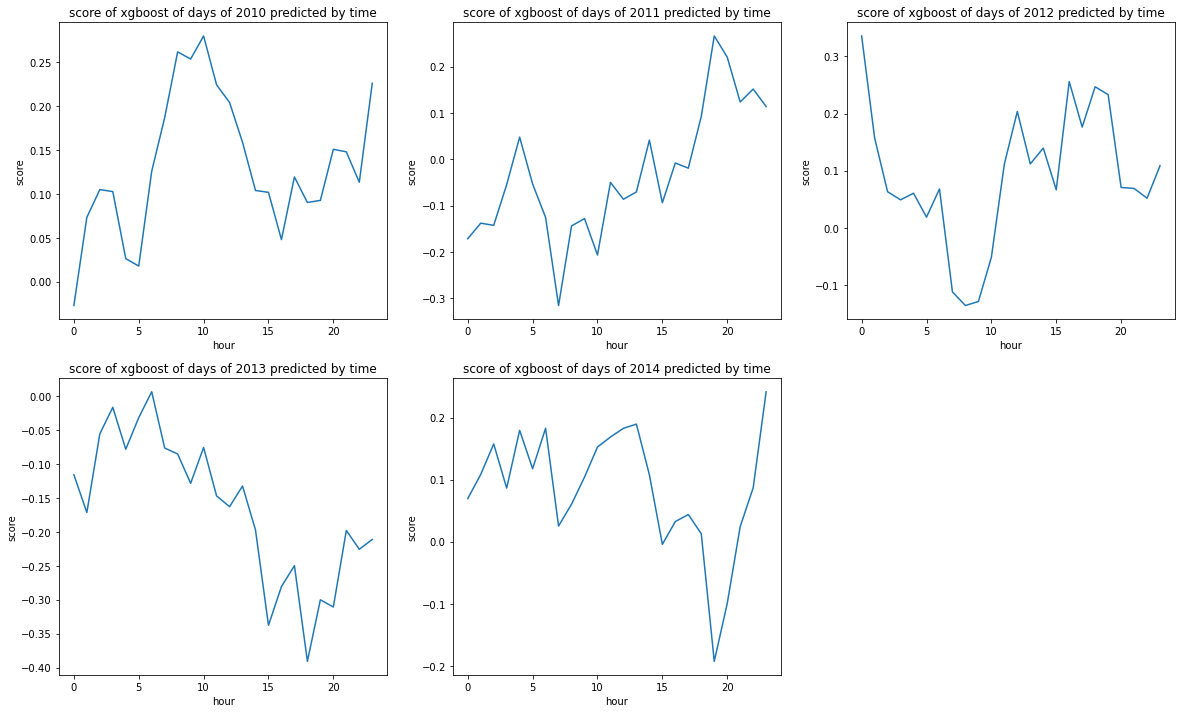

In [17]:
variation_of_day_time=variation_of_day_time.append(score_of_year_time)
variation_of_day_weather=variation_of_day_weather.append(score_of_year_weather)
plt.figure(figsize=(20,12))

for i in range(5):
    plt.subplot(2,3,i+1)
    plt.plot(Hour,variation_of_day_time.iloc[i,:])
    plt.title('score of xgboost of days of %d predicted by time' % Year[i])
    plt.xlabel('hour')
    plt.ylabel('score')


In [50]:
variation_of_day_time

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,-0.027030,0.073248,0.104819,0.102602,0.026311,0.017868,0.125726,0.186676,0.261507,0.253381,...,0.103834,0.101733,0.047934,0.119219,0.090183,0.092600,0.150685,0.147818,0.113221,0.225794
1,-0.171087,-0.137582,-0.142253,-0.054530,0.048059,-0.053146,-0.125221,-0.315144,-0.143494,-0.127715,...,0.041631,-0.093565,-0.007764,-0.018977,0.092624,0.266139,0.220555,0.123736,0.151588,0.113872
2,0.335730,0.157422,0.063193,0.049043,0.060586,0.018721,0.068088,-0.112097,-0.135828,-0.128844,...,0.139553,0.066662,0.255837,0.176417,0.246867,0.233090,0.070667,0.069013,0.051837,0.108772
3,-0.115433,-0.171291,-0.055168,-0.016001,-0.077835,-0.031252,0.006960,-0.076091,-0.084841,-0.128165,...,-0.197040,-0.337688,-0.280594,-0.249702,-0.390879,-0.300091,-0.310704,-0.197696,-0.225499,-0.211052
4,0.069574,0.108418,0.157552,0.086476,0.179506,0.117684,0.182852,0.025302,0.060526,0.104129,...,0.107946,-0.004091,0.032569,0.043899,0.012966,-0.192547,-0.099480,0.024445,0.086917,0.241614


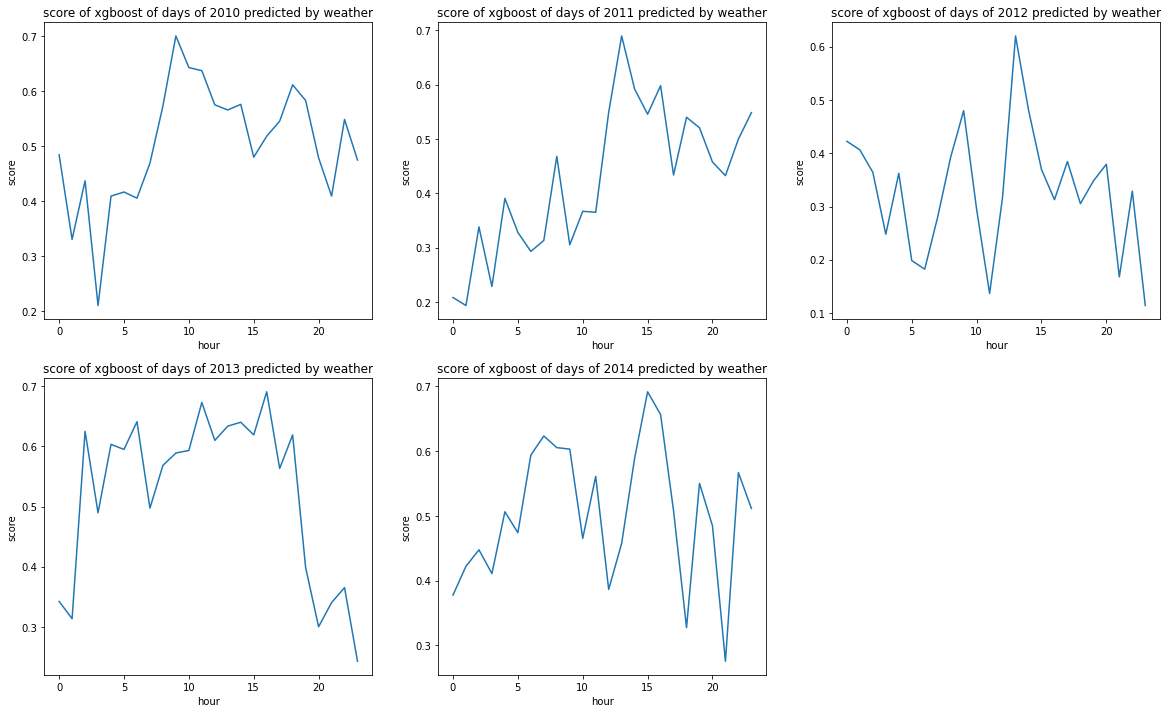

In [18]:
plt.figure(figsize=(20,12))

for i in range(5):
    plt.subplot(2,3,i+1)
    plt.plot(Hour,variation_of_day_weather.iloc[i,:])
    plt.title('score of xgboost of days of %d predicted by weather' % Year[i])
    plt.xlabel('hour')
    plt.ylabel('score')

In [51]:
variation_of_day_weather

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.484175,0.330778,0.436921,0.210669,0.409236,0.416625,0.405500,0.468941,0.572670,0.699811,...,0.575659,0.479859,0.517847,0.545219,0.611131,0.582763,0.478728,0.409242,0.548306,0.474665
1,0.208643,0.193898,0.338353,0.228790,0.390699,0.328249,0.293324,0.313548,0.468043,0.305480,...,0.591662,0.545510,0.597882,0.433693,0.539858,0.520465,0.457563,0.432569,0.499842,0.548320
2,0.422473,0.406344,0.364214,0.247945,0.362415,0.198508,0.182325,0.280484,0.392758,0.479930,...,0.481200,0.369709,0.312866,0.384467,0.305364,0.347888,0.379447,0.167888,0.328857,0.114125
3,0.342210,0.313514,0.625048,0.489605,0.603393,0.594982,0.641107,0.497282,0.568440,0.588988,...,0.640180,0.619117,0.690863,0.563296,0.619121,0.398595,0.300094,0.340289,0.365109,0.242613
4,0.377529,0.422092,0.447487,0.410686,0.506299,0.473846,0.593863,0.623391,0.605407,0.603071,...,0.589062,0.691717,0.656549,0.507680,0.327205,0.550184,0.484522,0.275134,0.566723,0.511360


## 比较可知，运用天气信息的预测准度明显更高，最高与使用所有训练集得到的预测模型的准度相似

## 3.3 分别使用每年每月数据的时间信息和天气信息，对每月pm2.5平均浓度进行预测，将两种方法下每年每月的预测score用折线图分别绘出

## Predict pm2.5 on time period of the month by xgboost

In [19]:
Month = range(1,13)
week_of_year=[[],[],[],[],[]]
score_of_month_weather = [[],[],[],[],[]]
score_of_month_time = [[],[],[],[],[]]

variation_of_month_time=pd.DataFrame()
variation_of_month_weather=pd.DataFrame()
for index, year in enumerate(Year):
    train_data_year=train_data[train_data.year==year]
    test_data_year=test_data[test_data.year==year]
    for month in Month:
        train_data_month_year=train_data_year[train_data_year.month==month]
        test_data_month_year=test_data_year[test_data_year.month==month]
        
        ## Only use time to predict
        X_train_data_month_year_time = train_data_month_year[var_time]
        X_test_data_month_year_time = test_data_month_year[var_time]
        y_train_data_month_year = train_data_month_year['pm2.5_log']
        y_test_data_month_year = test_data_month_year['pm2.5']
        XGB_model_time=XGBRegressor(learning_rate=0.03,n_estimators=300,max_depth=5)
        XGB_model_time.fit(X_train_data_month_year_time, y_train_data_month_year)

        y_pred_month_year_time = XGB_model_time.predict(X_test_data_month_year_time)
        y_pred_month_year_time = np.round(np.exp(y_pred_month_year_time)) 
        y_pred_month_year_time = preprocessing.minmax_scale(y_pred_month_year_time)
        y_test_data_month_year = preprocessing.minmax_scale(y_test_data_month_year)
        score_of_month_time[index].append(XGB_model_time.score(X_test_data_month_year_time,test_data_month_year['pm2.5_log']))   

        ## Only use weather to predict
        X_train_data_month_year_weather = train_data_month_year[var_weather]
        X_test_data_month_year_weather = test_data_month_year[var_weather]
        XGB_model_weather = XGBRegressor(learning_rate=0.03,n_estimators=300,max_depth=5)
        XGB_model_weather.fit(X_train_data_month_year_weather, y_train_data_month_year)

        y_pred_month_year_weather = XGB_model_weather.predict(X_test_data_month_year_weather)
        y_pred_month_year_weather = np.round(np.exp(y_pred_month_year_weather)) 
        y_pred_month_year_weather = preprocessing.minmax_scale(y_pred_month_year_weather)
        y_test_data_month_year = preprocessing.minmax_scale(y_test_data_month_year)
        score_of_month_weather[index].append(XGB_model_weather.score(X_test_data_month_year_weather,test_data_month_year['pm2.5_log']))      
        

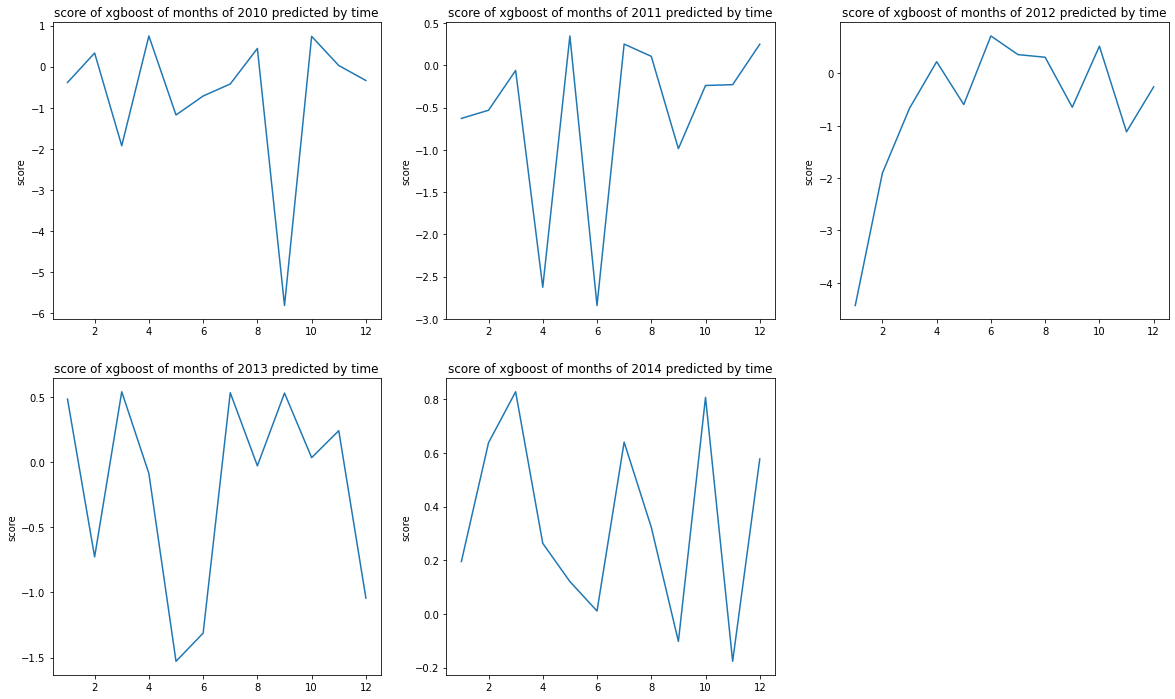

In [20]:
variation_of_month_time=variation_of_month_time.append(score_of_month_time)
variation_of_month_weather=variation_of_month_weather.append(score_of_month_weather)
plt.figure(figsize=(20,12))

for i in range(5):
    plt.subplot(2,3,i+1)
    plt.plot(Month,variation_of_month_time.iloc[i,:])
    plt.title('score of xgboost of months of %d predicted by time' % Year[i])
    plt.ylabel('score')

In [52]:
variation_of_month_time

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.383635,0.334482,-1.922651,0.749923,-1.174193,-0.711958,-0.418752,0.445914,-5.811449,0.739912,0.030015,-0.334421
1,-0.627129,-0.530581,-0.059664,-2.625588,0.348784,-2.841746,0.252619,0.107762,-0.985592,-0.237403,-0.227672,0.250640
2,-4.433642,-1.904614,-0.665120,0.225588,-0.593157,0.717346,0.360540,0.310522,-0.644360,0.521479,-1.114253,-0.255487
3,0.484040,-0.727425,0.539942,-0.086825,-1.528998,-1.312753,0.532808,-0.028277,0.529805,0.034274,0.241172,-1.043412
4,0.195112,0.637800,0.827856,0.262985,0.120473,0.010643,0.640222,0.323143,-0.102564,0.806916,-0.176908,0.577419


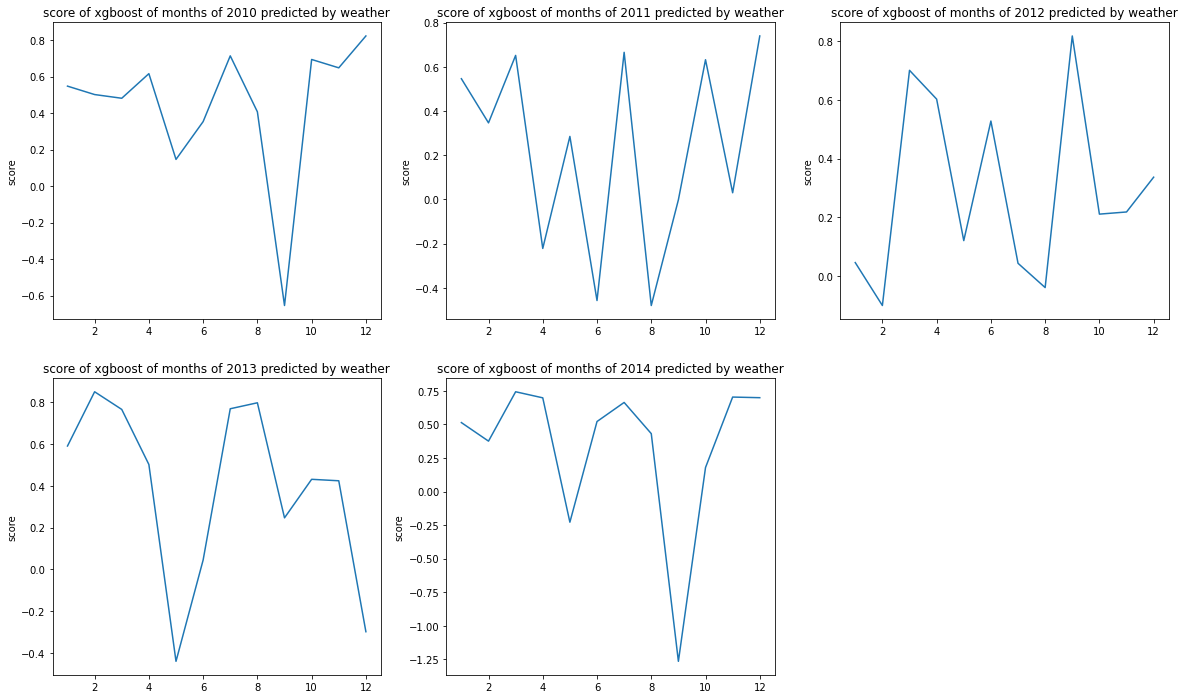

In [21]:
plt.figure(figsize=(20,12))

for i in range(5):
    plt.subplot(2,3,i+1)
    plt.plot(Month,variation_of_month_weather.iloc[i,:])
    plt.title('score of xgboost of months of %d predicted by weather' % Year[i])
    plt.ylabel('score')


In [53]:
variation_of_month_weather

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.547485,0.501328,0.481045,0.615839,0.145980,0.353028,0.713370,0.406811,-0.654742,0.693597,0.647775,0.822447
1,0.546092,0.346419,0.651510,-0.221525,0.285087,-0.457112,0.665464,-0.479666,-0.001508,0.631941,0.030286,0.739473
2,0.045147,-0.101374,0.701375,0.603057,0.120128,0.528274,0.042748,-0.040120,0.818690,0.210542,0.217907,0.336643
3,0.590243,0.849584,0.765141,0.501883,-0.439269,0.045040,0.768364,0.796922,0.246779,0.431007,0.424018,-0.297711
4,0.513193,0.375152,0.742746,0.697586,-0.228545,0.521123,0.663219,0.430967,-1.264672,0.178570,0.703295,0.698655


## 可以看出，虽然用每月平均浓度预测时只用天气信息可以达到更高精度，但预测准度更加不稳定，既可以达到0.8，也可以达到-1.25

## 3.4 分别使用每年每季数据的时间信息和天气信息，对每季pm2.5平均浓度进行预测，将两种方法下每年每季的预测score用折线图分别绘出

## Predict pm2.5 on time period of the season by xgboost

In [67]:
season_of_year=[[],[],[],[],[]]
score_of_season_weather = [[],[],[],[],[]]
score_of_season_time = [[],[],[],[],[]]

variation_of_season_time=pd.DataFrame()
variation_of_season_weather=pd.DataFrame()
for index, year in enumerate(Year):
   train_data_year=train_data[train_data.year==year]
   test_data_year=test_data[test_data.year==year]
   train_data_spring_year=pd.concat([train_data_year[train_data_year.month==3], train_data_year[train_data_year.month==4], train_data_year[train_data_year.month==5]],
      sort=False)
   test_data_spring_year=pd.concat([test_data_year[test_data_year.month==3], test_data_year[test_data_year.month==4], test_data_year[test_data_year.month==5]],
      sort=False)
   train_data_summer_year=pd.concat([train_data_year[train_data_year.month==6], train_data_year[train_data_year.month==7], train_data_year[train_data_year.month==8]],
      sort=False)
   test_data_summer_year=pd.concat([test_data_year[test_data_year.month==6], test_data_year[test_data_year.month==7], test_data_year[test_data_year.month==8]],
      sort=False)
   train_data_fall_year=pd.concat([train_data_year[train_data_year.month==9], train_data_year[train_data_year.month==10], train_data_year[train_data_year.month==11]],
      sort=False)
   test_data_fall_year=pd.concat([test_data_year[test_data_year.month==9], test_data_year[test_data_year.month==10], test_data_year[test_data_year.month==11]],
      sort=False)
   train_data_winter_year=pd.concat([train_data_year[train_data_year.month==12], train_data_year[train_data_year.month==1], train_data_year[train_data_year.month==2]],
      sort=False)
   test_data_winter_year=pd.concat([test_data_year[test_data_year.month==12], test_data_year[test_data_year.month==1], test_data_year[test_data_year.month==2]],
      sort=False)  
   ## Only use time to predict for spring
   X_train_data_spring_year_time = train_data_spring_year[var_time]
   X_test_data_spring_year_time = test_data_spring_year[var_time]
   y_train_data_spring_year = train_data_spring_year['pm2.5_log']
   y_test_data_spring_year = test_data_spring_year['pm2.5']
   XGB_model_time_spring=XGBRegressor(learning_rate=0.03,n_estimators=300,max_depth=5)
   XGB_model_time_spring.fit(X_train_data_spring_year_time, y_train_data_spring_year)

   y_pred_spring_year_time = XGB_model_time_spring.predict(X_test_data_spring_year_time)
   y_pred_spring_year_time = np.round(np.exp(y_pred_spring_year_time)) 
   y_pred_spring_year_time = preprocessing.minmax_scale(y_pred_spring_year_time)
   y_test_data_spring_year = preprocessing.minmax_scale(y_test_data_spring_year)
   score_of_season_time[index].append(XGB_model_time_spring.score(X_test_data_spring_year_time,test_data_spring_year['pm2.5_log']))   

   ## Only use weather to predict for spring
   X_train_data_spring_year_weather = train_data_spring_year[var_weather]
   X_test_data_spring_year_weather = test_data_spring_year[var_weather]
   XGB_model_weather_spring = XGBRegressor(learning_rate=0.03,n_estimators=300,max_depth=5)
   XGB_model_weather_spring.fit(X_train_data_spring_year_weather, y_train_data_spring_year)

   y_pred_spring_year_weather = XGB_model_weather_spring.predict(X_test_data_spring_year_weather)
   y_pred_spring_year_weather = np.round(np.exp(y_pred_spring_year_weather)) 
   y_pred_spring_year_weather = preprocessing.minmax_scale(y_pred_spring_year_weather)
   y_test_data_spring_year = preprocessing.minmax_scale(y_test_data_spring_year)
   score_of_season_weather[index].append(XGB_model_weather_spring.score(X_test_data_spring_year_weather,test_data_spring_year['pm2.5_log'])) 

   ## Only use time to predict for summer
   X_train_data_summer_year_time = train_data_summer_year[var_time]
   X_test_data_summer_year_time = test_data_summer_year[var_time]
   y_train_data_summer_year = train_data_summer_year['pm2.5_log']
   y_test_data_summer_year = test_data_summer_year['pm2.5']
   XGB_model_time_summer=XGBRegressor(learning_rate=0.03,n_estimators=300,max_depth=5)
   XGB_model_time_summer.fit(X_train_data_summer_year_time, y_train_data_summer_year)

   y_pred_summer_year_time = XGB_model_time_summer.predict(X_test_data_summer_year_time)
   y_pred_summer_year_time = np.round(np.exp(y_pred_summer_year_time)) 
   y_pred_summer_year_time = preprocessing.minmax_scale(y_pred_summer_year_time)
   y_test_data_summer_year = preprocessing.minmax_scale(y_test_data_summer_year)
   score_of_season_time[index].append(XGB_model_time_summer.score(X_test_data_summer_year_time,test_data_summer_year['pm2.5_log']))   

   ## Only use weather to predict for summer
   X_train_data_summer_year_weather = train_data_summer_year[var_weather]
   X_test_data_summer_year_weather = test_data_summer_year[var_weather]
   XGB_model_weather_summer = XGBRegressor(learning_rate=0.03,n_estimators=300,max_depth=5)
   XGB_model_weather_summer.fit(X_train_data_summer_year_weather, y_train_data_summer_year)

   y_pred_summer_year_weather = XGB_model_weather_summer.predict(X_test_data_summer_year_weather)
   y_pred_summer_year_weather = np.round(np.exp(y_pred_summer_year_weather)) 
   y_pred_summer_year_weather = preprocessing.minmax_scale(y_pred_summer_year_weather)
   y_test_data_summer_year = preprocessing.minmax_scale(y_test_data_summer_year)
   score_of_season_weather[index].append(XGB_model_weather_summer.score(X_test_data_summer_year_weather,test_data_summer_year['pm2.5_log']))

   ## Only use time to predict for fall
   X_train_data_fall_year_time = train_data_fall_year[var_time]
   X_test_data_fall_year_time = test_data_fall_year[var_time]
   y_train_data_fall_year = train_data_fall_year['pm2.5_log']
   y_test_data_fall_year = test_data_fall_year['pm2.5']
   XGB_model_time_fall=XGBRegressor(learning_rate=0.03,n_estimators=300,max_depth=5)
   XGB_model_time_fall.fit(X_train_data_fall_year_time, y_train_data_fall_year)

   y_pred_fall_year_time = XGB_model_time_fall.predict(X_test_data_fall_year_time)
   y_pred_fall_year_time = np.round(np.exp(y_pred_fall_year_time)) 
   y_pred_fall_year_time = preprocessing.minmax_scale(y_pred_fall_year_time)
   y_test_data_fall_year = preprocessing.minmax_scale(y_test_data_fall_year)
   score_of_season_time[index].append(XGB_model_time_fall.score(X_test_data_fall_year_time,test_data_fall_year['pm2.5_log']))   

   ## Only use weather to predict for fall
   X_train_data_fall_year_weather = train_data_fall_year[var_weather]
   X_test_data_fall_year_weather = test_data_fall_year[var_weather]
   XGB_model_weather_fall = XGBRegressor(learning_rate=0.03,n_estimators=300,max_depth=5)
   XGB_model_weather_fall.fit(X_train_data_fall_year_weather, y_train_data_fall_year)

   y_pred_fall_year_weather = XGB_model_weather_fall.predict(X_test_data_fall_year_weather)
   y_pred_fall_year_weather = np.round(np.exp(y_pred_fall_year_weather)) 
   y_pred_fall_year_weather = preprocessing.minmax_scale(y_pred_fall_year_weather)
   y_test_data_fall_year = preprocessing.minmax_scale(y_test_data_fall_year)
   score_of_season_weather[index].append(XGB_model_weather_fall.score(X_test_data_fall_year_weather,test_data_fall_year['pm2.5_log']))
    

   ## Only use time to predict for winter
   X_train_data_winter_year_time = train_data_winter_year[var_time]
   X_test_data_winter_year_time = test_data_winter_year[var_time]
   y_train_data_winter_year = train_data_winter_year['pm2.5_log']
   y_test_data_winter_year = test_data_winter_year['pm2.5']
   XGB_model_time_winter=XGBRegressor(learning_rate=0.03,n_estimators=300,max_depth=5)
   XGB_model_time_winter.fit(X_train_data_winter_year_time, y_train_data_winter_year)

   y_pred_winter_year_time = XGB_model_time_winter.predict(X_test_data_winter_year_time)
   y_pred_winter_year_time = np.round(np.exp(y_pred_winter_year_time)) 
   y_pred_winter_year_time = preprocessing.minmax_scale(y_pred_winter_year_time)
   y_test_data_winter_year = preprocessing.minmax_scale(y_test_data_winter_year)
   score_of_season_time[index].append(XGB_model_time_winter.score(X_test_data_winter_year_time,test_data_winter_year['pm2.5_log']))   

   ## Only use weather to predict for winter
   X_train_data_winter_year_weather = train_data_winter_year[var_weather]
   X_test_data_winter_year_weather = test_data_winter_year[var_weather]
   XGB_model_weather_winter = XGBRegressor(learning_rate=0.03,n_estimators=300,max_depth=5)
   XGB_model_weather_winter.fit(X_train_data_winter_year_weather, y_train_data_winter_year)

   y_pred_winter_year_weather = XGB_model_weather_winter.predict(X_test_data_winter_year_weather)
   y_pred_winter_year_weather = np.round(np.exp(y_pred_winter_year_weather)) 
   y_pred_winter_year_weather = preprocessing.minmax_scale(y_pred_winter_year_weather)
   y_test_data_winter_year = preprocessing.minmax_scale(y_test_data_winter_year)
   score_of_season_weather[index].append(XGB_model_weather_winter.score(X_test_data_winter_year_weather,test_data_winter_year['pm2.5_log']))
variation_of_season_weather=variation_of_season_weather.append(score_of_season_weather)

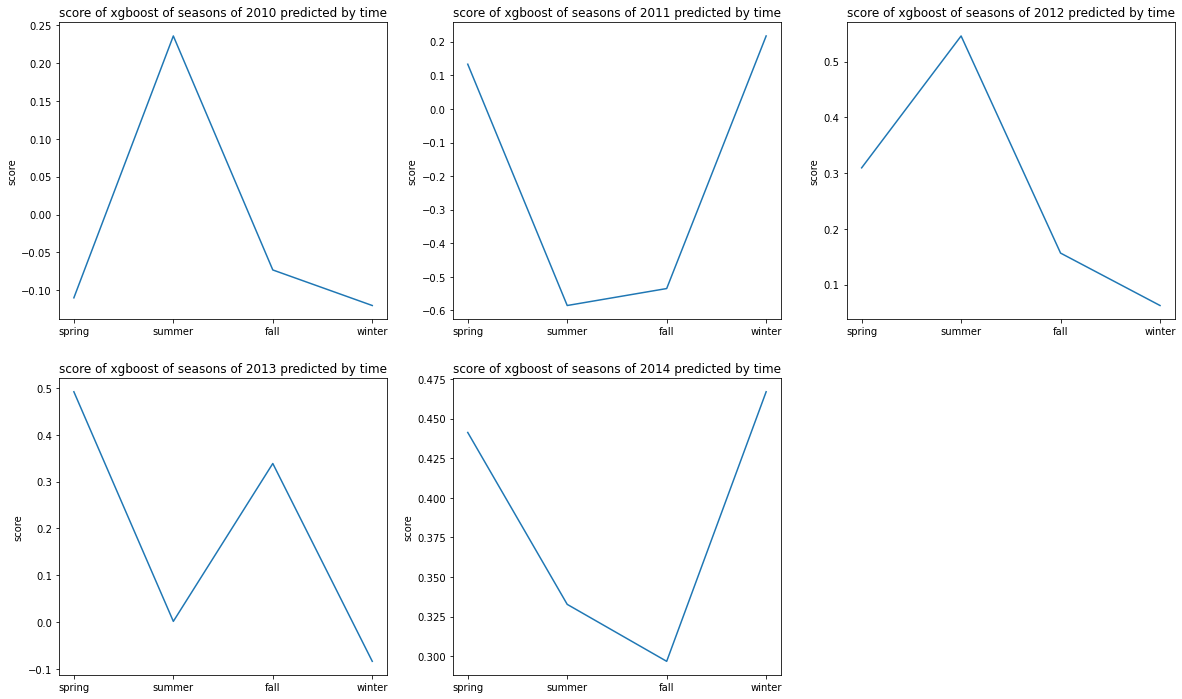

In [68]:
variation_of_season_time=variation_of_season_time.append(score_of_season_time)

plt.figure(figsize=(20,12))
Seasons=['spring','summer','fall','winter']

for i in range(5):
    plt.subplot(2,3,i+1)
    plt.plot(Seasons,variation_of_season_time.iloc[i,:])
    plt.title('score of xgboost of seasons of %d predicted by time' % Year[i])
    plt.ylabel('score')



In [54]:
variation_of_season_time

,0,1,2,3
0,-0.110092,0.235979,-0.073259,-0.120247
1,0.133243,-0.585266,-0.534747,0.217305
2,0.309382,0.545886,0.156495,0.062482
3,0.492038,0.001488,0.338788,-0.083888
4,0.441307,0.332737,0.296765,0.467010


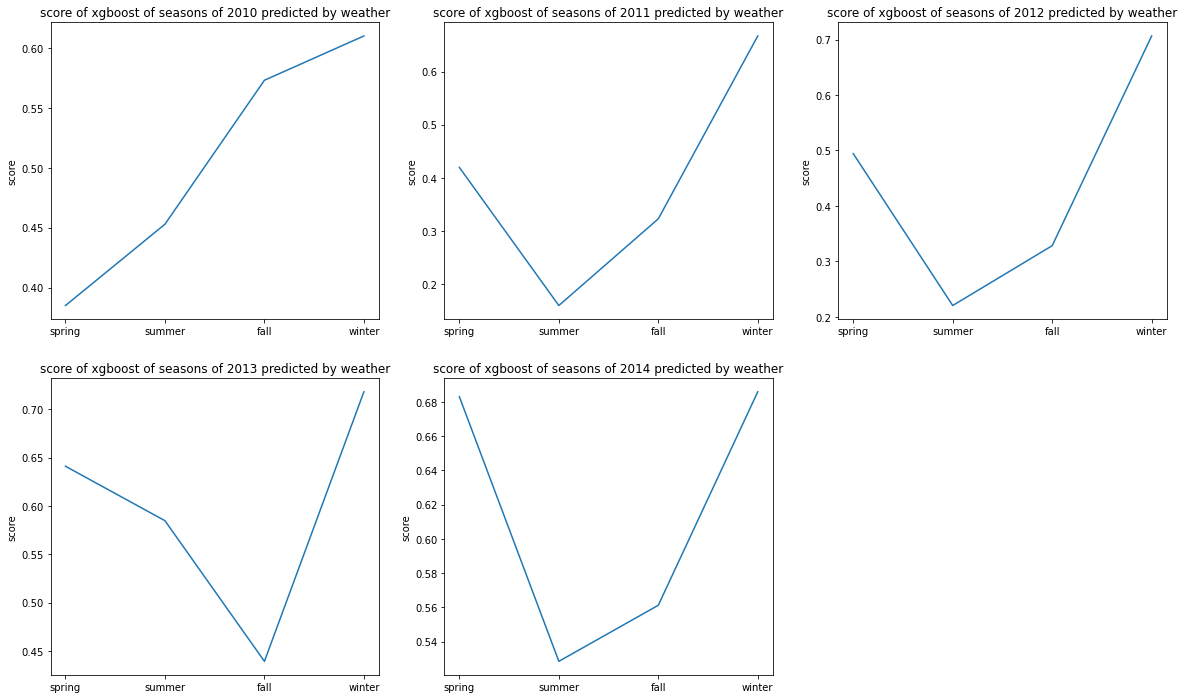

In [69]:
plt.figure(figsize=(20,12))

for i in range(5):
    plt.subplot(2,3,i+1)
    plt.plot(Seasons,variation_of_season_weather.iloc[i,:])
    plt.title('score of xgboost of seasons of %d predicted by weather' % Year[i])
    plt.ylabel('score')

In [70]:
variation_of_season_weather

,0,1,2,3
0,0.385050,0.452968,0.573221,0.610227
1,0.419754,0.160140,0.323148,0.666922
2,0.494261,0.220412,0.328318,0.706501
3,0.641045,0.584753,0.439383,0.718063
4,0.682956,0.528580,0.561287,0.685849


## 同理，此处我们应该用天气信息进行预测，且这五年间冬天均达到最高准度，后四年夏秋两季均为最低

## 4.1用折线图记录每年周一早晨（6点至9点）每小时平均pm2.5的变化趋势，取每年每星期一每小时的平均浓度作为当年该天该小时的对应值

## Variation of pm2.5 on time period of the Monday morning

In [25]:
Hour_Mon=range(6,10)
Week_Mon=range(1)
day_of_year_Mon=[[],[],[],[],[]]

variation_of_day_Mon=pd.DataFrame()
for index, year in enumerate(Year):
    pm25_year=pm25_dropna[pm25_dropna.year==year]
    for week in Week_Mon:
        pm25_Mon_year=pm25_year[pm25_year.week==week]
        for hour in Hour_Mon:
            pm25_hour_year_Mon=pm25_Mon_year[pm25_Mon_year.hour==hour]
            mean=np.mean(pm25_hour_year_Mon['pm2.5'])
            day_of_year_Mon[index].append(mean)
        
variation_of_day_Mon=variation_of_day_Mon.append(day_of_year_Mon)
variation_of_day_Mon.index=Year 

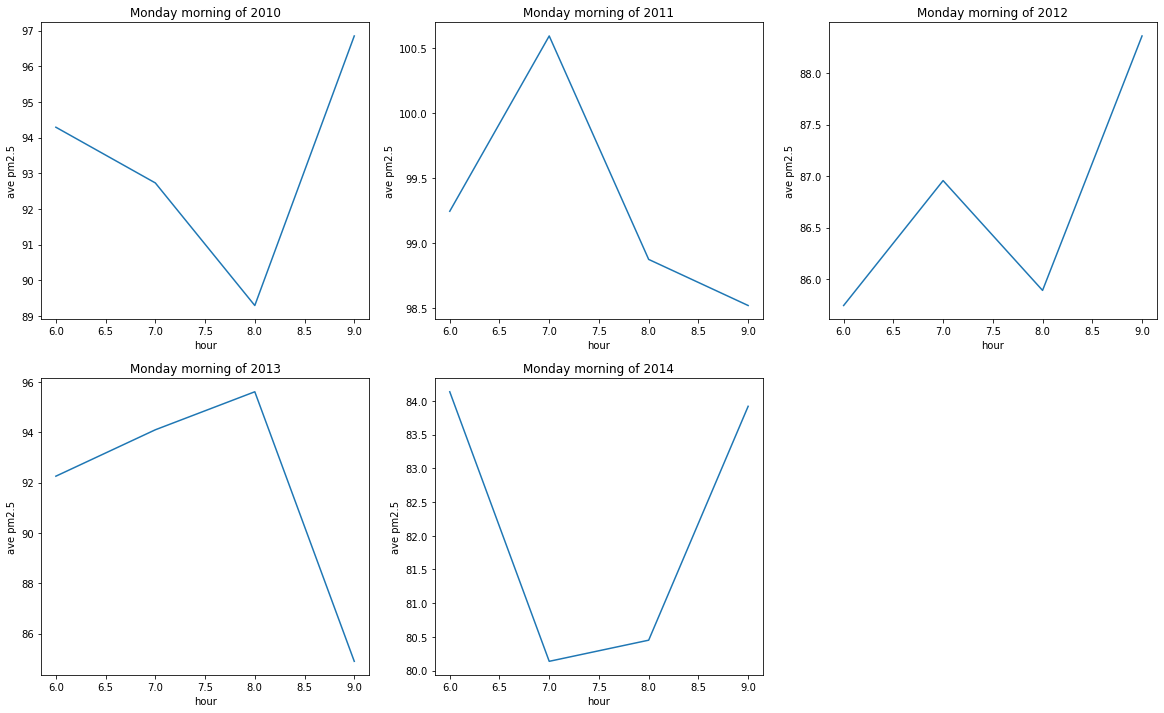

In [26]:
plt.figure(figsize=(20,12))

for i in range(5):
    plt.subplot(2,3,i+1)
    plt.plot(Hour_Mon,variation_of_day_Mon.iloc[i,:])
    plt.title('Monday morning of %d' % Year[i])
    plt.xlabel('hour')
    plt.ylabel('ave pm2.5')    

In [56]:
variation_of_day_Mon

,0,1,2,3
2010,94.291667,92.729167,89.291667,96.851064
2011,99.244898,100.591837,98.875000,98.520833
2012,85.744681,86.957447,85.891304,88.361702
2013,92.254902,94.098039,95.607843,84.901961
2014,84.137255,80.137255,80.450980,83.921569


## 我们注意到每年星期一早晨每小时pm2.5平均浓度变化趋势不同，但除2013年外均在8点取得最低值

## 4.2用折线图记录每年12月周末（周六周日）晚上（18点至24点）每小时平均pm2.5的变化趋势，取每年12月周末每天每小时的平均浓度作为当年该天该小时的对应值

## Variation of pm2.5 on time period of the evening of the weekend in December

In [32]:
from pandas.core.frame import DataFrame
Hour_even=range(18,24)
week_dec=range(5,7)
month_dec=range(12,13)
weekend_Dec_2010=['2010-12-04', '2010-12-05', '2010-12-11', '2010-12-12', '2010-12-18', '2010-12-19', '2010-12-25', '2010-12-26']
weekend_Dec_2011=['2011-12-03', '2011-12-04', '2011-12-10', '2011-12-11', '2011-12-17', '2011-12-18', '2011-12-24', '2011-12-25', '2011-12-31']             
weekend_Dec_2012=['2012-12-01', '2012-12-02', '2012-12-08', '2012-12-09', '2012-12-15', '2012-12-16', '2012-12-22', '2012-12-23', '2012-12-29', '2012-12-30']             
weekend_Dec_2013=[ '2013-12-07', '2013-12-08', '2013-12-14', '2013-12-15', '2013-12-21', '2013-12-28', '2013-12-29']          
weekend_Dec_2014=['2014-12-06', '2014-12-07', '2014-12-13', '2014-12-14', '2014-12-20', '2014-12-21', '2014-12-27', '2014-12-28']             
day_of_year_Dec=[[],[],[],[],[]]

variation_of_day_dec=pd.DataFrame()
for index, year in enumerate(Year):
    pm25_year=pm25_dropna[pm25_dropna.year==year]
    for month in month_dec:
        pm25_dec_year=pm25_year[pm25_year.month==month]
        pm25_weekend_dec_year=pd.concat([pm25_dec_year[pm25_dec_year.week==5], pm25_dec_year[pm25_dec_year.week==6]], sort=False)
        for hour in Hour_even:
            pm25_even_weekend_dec_year=pm25_weekend_dec_year[pm25_weekend_dec_year.hour==hour]
            mean=np.mean(pm25_even_weekend_dec_year['pm2.5'])
            day_of_year_Dec[index].append(mean)

variation_of_day_dec=variation_of_day_dec.append(day_of_year_Dec)
variation_of_day_dec.index=Year

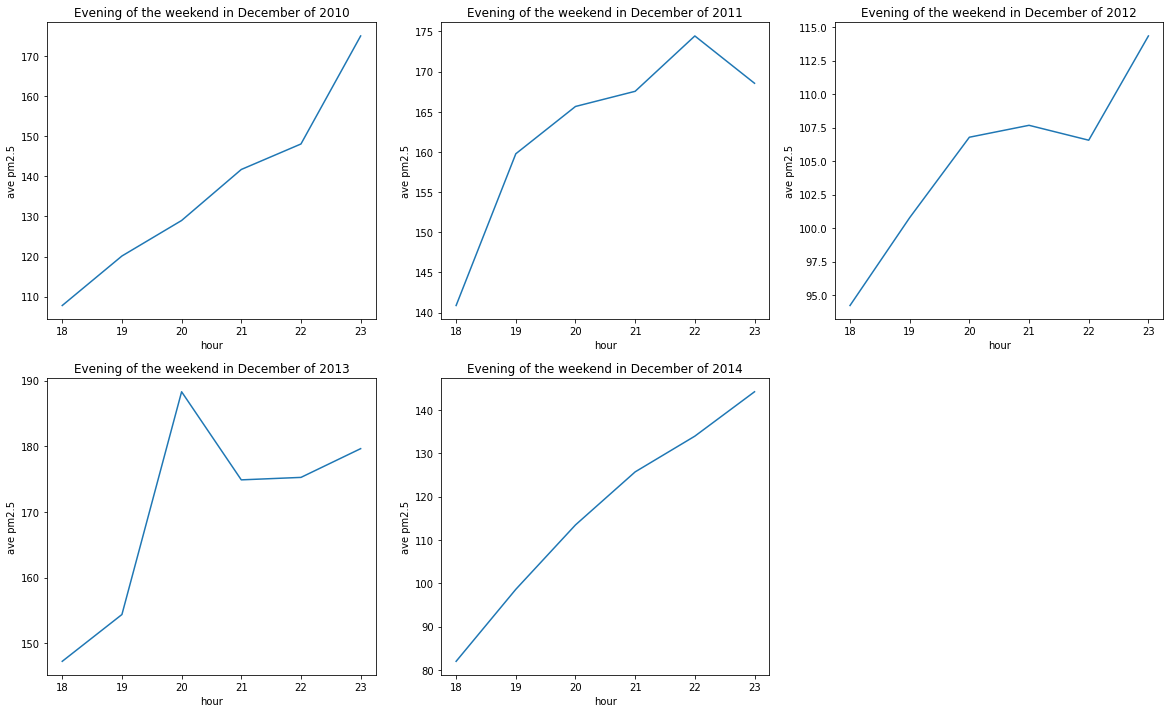

In [33]:
plt.figure(figsize=(20,12))

for i in range(5):
    plt.subplot(2,3,i+1)
    plt.plot(Hour_even,variation_of_day_dec.iloc[i,:])
    plt.title('Evening of the weekend in December of %d' % Year[i])
    plt.xlabel('hour')
    plt.ylabel('ave pm2.5')  

In [57]:
variation_of_day_dec

,0,1,2,3,4,5
2010,107.750000,120.125000,129.000000,141.750000,148.125000,175.125000
2011,140.888889,159.777778,165.666667,167.555556,174.444444,168.555556
2012,94.222222,100.777778,106.777778,107.666667,106.555556,114.333333
2013,147.250000,154.375000,188.285714,174.875000,175.250000,179.625000
2014,82.000000,98.625000,113.500000,125.750000,134.000000,144.250000


## 我们注意到平均浓度基本均为上升趋势

## 4.2用折线图记录每年春节期间（除夕前两天、除夕、正月初一至初七、初七后两天）每小时平均pm2.5的变化趋势，取每年春节每小时的平均浓度作为当年春节该小时的对应值

## Variation of pm2.5 on time period of one day of Spring Festival

In [43]:
Spr=range(12)
sprfest_2010 = ['2010-02-11', '2010-02-12', '2010-02-13', '2010-02-14', '2010-02-15', '2010-02-16', '2010-02-17', '2010-02-18', '2010-02-19', '2010-02-20', '2010-02-21', '2010-02-22']
sprfest_2011 = ['2011-01-31', '2011-02-01', '2011-02-02', '2011-02-03', '2011-02-04', '2011-02-05', '2011-02-06', '2011-02-07', '2011-02-08', '2011-02-09', '2011-02-10', '2011-02-11']
sprfest_2012 = ['2012-01-20', '2012-01-21', '2012-01-22', '2012-01-23', '2012-01-24', '2012-01-25', '2012-01-26', '2012-01-27', '2012-01-28', '2012-01-29', '2012-01-30', '2012-01-31'] 
sprfest_2013 = ['2013-02-07', '2013-02-08', '2013-02-09', '2013-02-10', '2013-02-11', '2013-02-12', '2013-02-13', '2013-02-14', '2013-02-15', '2013-02-16', '2013-02-17', '2013-02-18']   
sprfest_2014 = ['2014-01-28', '2014-01-29', '2014-01-30', '2014-01-31', '2014-02-01', '2014-02-02', '2014-02-03', '2014-02-04', '2014-02-05', '2014-02-06', '2014-02-07', '2014-02-08'] 
hour_of_sprfest=[[],[],[],[],[]]
variation_of_hour_sprfest = pd.DataFrame()

pm25_sprfest_2010=pd.DataFrame()
for sprday_2010 in sprfest_2010:
    pm25_sprfest_2010_date=pm25_dropna[pm25_dropna.date==sprday_2010]
    pm25_sprfest_2010=pd.concat([pm25_sprfest_2010, pm25_sprfest_2010_date], sort=False)
for hour in Hour:
        pm25_hour_sprfest_2010=pm25_sprfest_2010[pm25_sprfest_2010.hour==hour]
        mean_spr_2010=np.mean(pm25_hour_sprfest_2010['pm2.5'])
        hour_of_sprfest[0].append(mean_spr_2010)

pm25_sprfest_2011=pd.DataFrame()
for sprday_2011 in sprfest_2011:
    pm25_sprfest_2011_date=pm25_dropna[pm25_dropna.date==sprday_2011]
    pm25_sprfest_2011=pd.concat([pm25_sprfest_2011, pm25_sprfest_2011_date], sort=False)
for hour in Hour:
        pm25_hour_sprfest_2011=pm25_sprfest_2011[pm25_sprfest_2011.hour==hour]
        mean_spr_2011=np.mean(pm25_hour_sprfest_2011['pm2.5'])
        hour_of_sprfest[1].append(mean_spr_2011)

pm25_sprfest_2012=pd.DataFrame()
for sprday_2012 in sprfest_2012:
    pm25_sprfest_2012_date=pm25_dropna[pm25_dropna.date==sprday_2012]
    pm25_sprfest_2012=pd.concat([pm25_sprfest_2012, pm25_sprfest_2012_date], sort=False)
for hour in Hour:
        pm25_hour_sprfest_2012=pm25_sprfest_2012[pm25_sprfest_2012.hour==hour]
        mean_spr_2012=np.mean(pm25_hour_sprfest_2012['pm2.5'])
        hour_of_sprfest[2].append(mean_spr_2012)

pm25_sprfest_2013=pd.DataFrame()
for sprday_2013 in sprfest_2013:
    pm25_sprfest_2013_date=pm25_dropna[pm25_dropna.date==sprday_2013]
    pm25_sprfest_2013=pd.concat([pm25_sprfest_2013, pm25_sprfest_2013_date], sort=False)
for hour in Hour:
        pm25_hour_sprfest_2013=pm25_sprfest_2013[pm25_sprfest_2013.hour==hour]
        mean_spr_2013=np.mean(pm25_hour_sprfest_2013['pm2.5'])
        hour_of_sprfest[3].append(mean_spr_2013)

pm25_sprfest_2014=pd.DataFrame()
for sprday_2014 in sprfest_2014:
    pm25_sprfest_2014_date=pm25_dropna[pm25_dropna.date==sprday_2014]
    pm25_sprfest_2014=pd.concat([pm25_sprfest_2014, pm25_sprfest_2014_date], sort=False)
for hour in Hour:
        pm25_hour_sprfest_2014=pm25_sprfest_2014[pm25_sprfest_2014.hour==hour]
        mean_spr_2014=np.mean(pm25_hour_sprfest_2014['pm2.5'])
        hour_of_sprfest[4].append(mean_spr_2014) 

variation_of_hour_sprfest=variation_of_hour_sprfest.append(hour_of_sprfest)


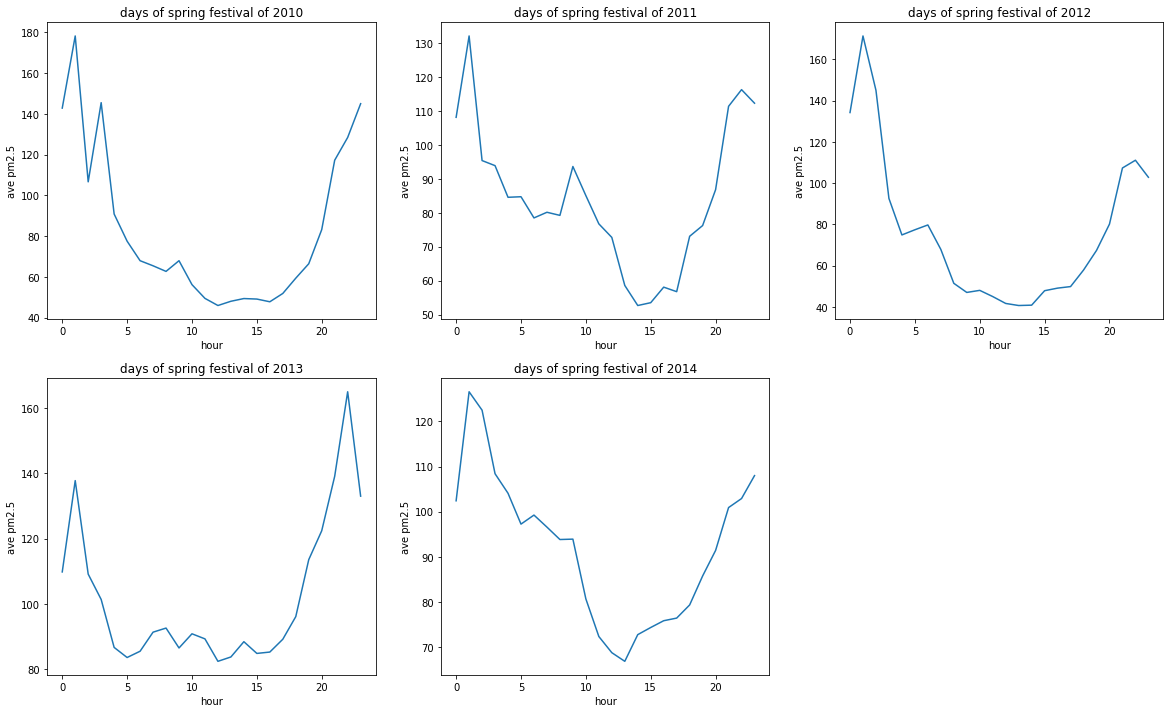

In [40]:
plt.figure(figsize=(20,12))

for i in range(5):
    plt.subplot(2,3,i+1)
    plt.plot(Hour,variation_of_hour_sprfest.iloc[i,:])
    plt.title('days of spring festival of %d' % Year[i])
    plt.xlabel('hour')
    plt.ylabel('ave pm2.5')

In [58]:
variation_of_hour_sprfest

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,142.833333,178.250000,106.636364,145.500000,90.833333,77.500000,67.916667,65.416667,62.666667,67.916667,...,49.333333,49.083333,47.750000,51.833333,59.333333,66.416667,83.166667,117.250000,128.416667,145.000000
1,108.166667,132.166667,95.416667,93.916667,84.583333,84.750000,78.500000,80.166667,79.250000,93.666667,...,52.666667,53.500000,58.083333,56.750000,73.083333,76.250000,86.833333,111.416667,116.333333,112.333333
2,134.166667,171.250000,144.916667,92.583333,74.916667,77.416667,79.750000,67.916667,51.500000,47.083333,...,40.916667,47.916667,49.166667,49.916667,57.916667,67.416667,80.166667,107.333333,111.083333,102.833333
3,109.833333,137.750000,109.166667,101.416667,86.750000,83.666667,85.583333,91.416667,92.666667,86.583333,...,88.500000,84.916667,85.333333,89.250000,96.166667,113.583333,122.416667,139.083333,164.916667,133.000000
4,102.416667,126.583333,122.500000,108.416667,104.083333,97.250000,99.250000,96.583333,93.833333,93.916667,...,72.750000,74.333333,75.833333,76.416667,79.333333,85.750000,91.416667,100.916667,102.916667,108.000000


## 我们注意到每天每小时的变化趋势与全年相似，均为15点后上升，凌晨1点后慢慢下降

## 4.3用折线图记录每年春节期间（除夕前两天、除夕、正月初一至初七、初七后两天，以除夕前第二天为第0天）每天平均pm2.5的变化趋势，取每年春节每天的平均浓度作为当年春节该天的对应值

## Variation of pm2.5 on time period of all days of Spring Festival

In [41]:
days_of_sprfest=[[],[],[],[],[]]
variation_of_days_sprfest = pd.DataFrame()

for sprday_2010 in sprfest_2010:
    pm25_day_sprfest_2010=pm25_sprfest_2010[pm25_sprfest_2010.date==sprday_2010]
    mean_spr_2010=np.mean(pm25_day_sprfest_2010['pm2.5'])
    days_of_sprfest[0].append(mean_spr_2010)

for sprday_2011 in sprfest_2011:
    pm25_day_sprfest_2011=pm25_sprfest_2011[pm25_sprfest_2011.date==sprday_2011]
    mean_spr_2011=np.mean(pm25_day_sprfest_2011['pm2.5'])
    days_of_sprfest[1].append(mean_spr_2011)

for sprday_2012 in sprfest_2012:
    pm25_day_sprfest_2012=pm25_sprfest_2012[pm25_sprfest_2012.date==sprday_2012]
    mean_spr_2012=np.mean(pm25_day_sprfest_2012['pm2.5'])
    days_of_sprfest[2].append(mean_spr_2012)

for sprday_2013 in sprfest_2013:
    pm25_day_sprfest_2013=pm25_sprfest_2013[pm25_sprfest_2013.date==sprday_2013]
    mean_spr_2013=np.mean(pm25_day_sprfest_2013['pm2.5'])
    days_of_sprfest[3].append(mean_spr_2013)

for sprday_2014 in sprfest_2014:
    pm25_day_sprfest_2014=pm25_sprfest_2014[pm25_sprfest_2014.date==sprday_2014]
    mean_spr_2014=np.mean(pm25_day_sprfest_2014['pm2.5'])
    days_of_sprfest[4].append(mean_spr_2014)

variation_of_days_sprfest=variation_of_days_sprfest.append(days_of_sprfest)

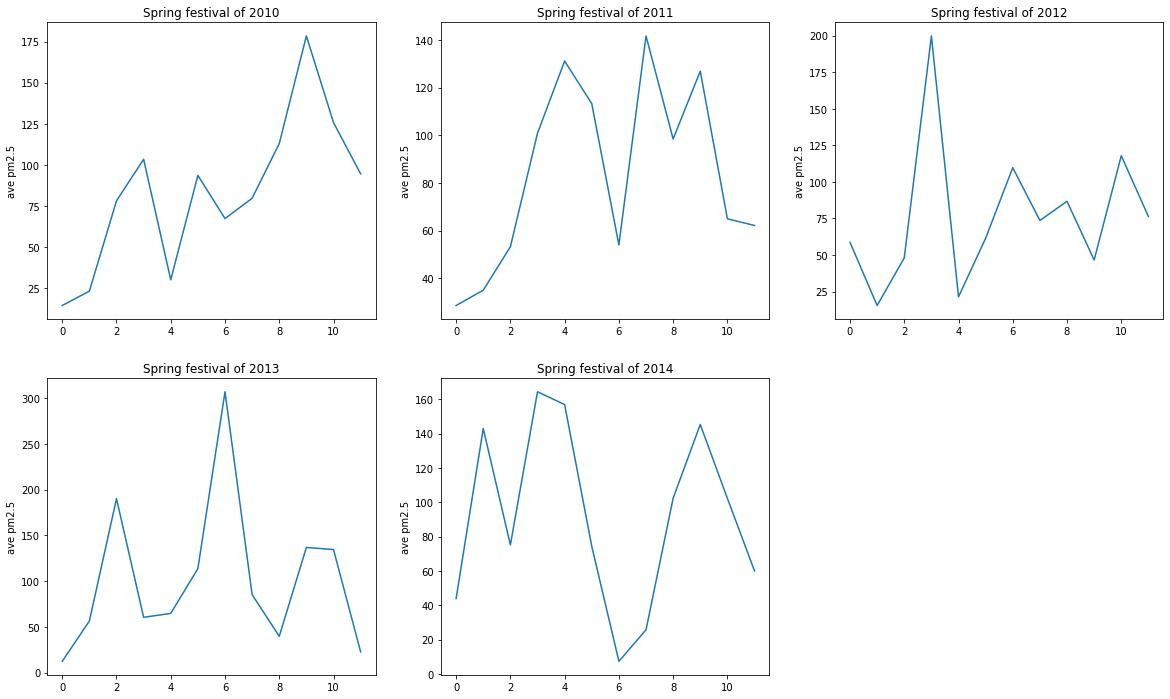

In [44]:
plt.figure(figsize=(20,12))

for i in range(5):
    plt.subplot(2,3,i+1)
    plt.plot(Spr,variation_of_days_sprfest.iloc[i,:])
    plt.title('Spring festival of %d' % Year[i])
    plt.ylabel('ave pm2.5')

In [59]:
variation_of_days_sprfest

,0,1,2,3,4,5,6,7,8,9,10,11
0,14.333333,23.083333,78.083333,103.391304,30.000000,93.583333,67.291667,79.666667,112.958333,178.500000,125.750000,94.500000
1,28.666667,35.083333,53.291667,100.875000,131.125000,113.250000,54.041667,141.625000,98.458333,126.875000,65.000000,62.208333
2,58.666667,15.458333,48.041667,199.875000,21.375000,61.500000,109.750000,73.625000,86.750000,46.583333,117.916667,76.375000
3,12.416667,56.458333,190.125000,60.500000,64.791667,113.708333,306.916667,85.260870,39.791667,136.833333,134.541667,22.791667
4,43.916667,142.875000,75.166667,164.291667,156.833333,74.375000,7.416667,25.750000,102.375000,145.250000,102.250000,60.041667


## 我们注意到平均浓度基本均出现3个高峰，分别在除夕前后，初三前后和初七前后